In [1]:
# from google.colab import drive
# drive.mount("/content/drive")
# import zipfile 
# with zipfile.ZipFile('/content/drive/My Drive/Vision_Arcadia/Hand_Gestures_Dataset_new_with_NOTHING.zip','r') as zip_ref:
#     zip_ref.extractall('/content/data/')

Mounted at /content/drive


In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
import pandas as pd
from skimage.transform import resize
from imageio import imread
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random as rn

rn.seed(30)
from keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, Concatenate, BatchNormalization, Input
from sklearn.model_selection import train_test_split
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

tf.random.set_seed(30)

In [3]:
train_dir = "/content/data/Hand_Gestures_Dataset_new_with_NOTHING/train"
test_dir = "/content/data/Hand_Gestures_Dataset_new_with_NOTHING/val"
img_size = (320, 120)


In [4]:
train_datagen = ImageDataGenerator(width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=False,
                                   rescale=1. / 255,
                                   validation_split=0.2)
validation_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.8)


In [5]:
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=img_size,
                                                    batch_size=64,
                                                    color_mode="grayscale",
                                                    class_mode="categorical",
                                                    subset="training",
                                                    shuffle=True,
                                                    seed=42)
validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=img_size,
    batch_size=64,
    color_mode="grayscale",
    class_mode="categorical",
    subset="validation",
    shuffle=True,
    seed=42)
#same for testing

Found 22400 images belonging to 8 classes.
Found 9600 images belonging to 8 classes.


In [6]:
model = Sequential(name="CIFAR_Sequential_CNN")

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(320, 120, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
model.summary()

Model: "CIFAR_Sequential_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 118, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 159, 59, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 157, 57, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 139776)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               35782912  
_________________________________________________________________
dropout (Dropout)            (None, 256)      

In [22]:
epochs = 6
batch_size = 64

In [23]:
history = model.fit(x=train_generator,
                    epochs=epochs,
                    validation_data=validation_generator)

Epoch 1/6
350/350 [==============================] - 248s 708ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.6641 - val_accuracy: 0.9014
Epoch 2/6
350/350 [==============================] - 248s 707ms/step - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.5446 - val_accuracy: 0.8991
Epoch 3/6
350/350 [==============================] - 232s 663ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.7240 - val_accuracy: 0.8847
Epoch 4/6
350/350 [==============================] - 230s 658ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.4669 - val_accuracy: 0.8994
Epoch 5/6
350/350 [==============================] - 227s 649ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.8131 - val_accuracy: 0.9040
Epoch 6/6
350/350 [==============================] - 240s 685ms/step - loss: 0.0298 - accuracy: 0.9911 - val_loss: 0.5091 - val_accuracy: 0.9024


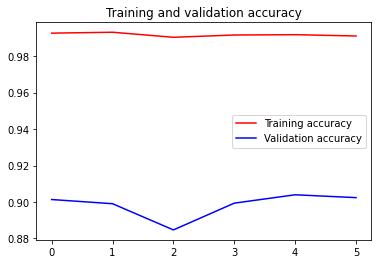

<Figure size 432x288 with 0 Axes>

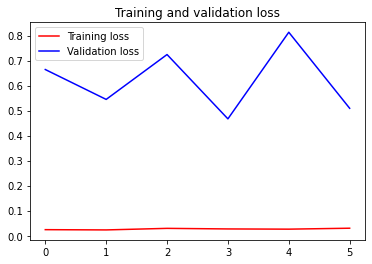

In [24]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [25]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(validation_generator)
print("final train accuracy = {:.2f}, validation accuracy = {:.2f}".format(
    train_acc * 100, test_acc * 100))

150/150 [==============================] - 64s 425ms/step - loss: 0.5091 - accuracy: 0.9024
final train accuracy = 99.70, validation accuracy = 90.24


In [26]:
model.save("/content/Model_Hand_Gestures")

INFO:tensorflow:Assets written to: /content/Model_Hand_Gestures/assets


In [27]:
!zip -r /content/Model_Hand_Gestures.zip /content/Model_Hand_Gestures

  adding: content/Model_Hand_Gestures/ (stored 0%)
  adding: content/Model_Hand_Gestures/keras_metadata.pb (deflated 91%)
  adding: content/Model_Hand_Gestures/assets/ (stored 0%)
  adding: content/Model_Hand_Gestures/saved_model.pb (deflated 89%)
  adding: content/Model_Hand_Gestures/variables/ (stored 0%)
  adding: content/Model_Hand_Gestures/variables/variables.data-00000-of-00001 (deflated 19%)
  adding: content/Model_Hand_Gestures/variables/variables.index (deflated 65%)


In [28]:
files.download('/content/Model_Hand_Gestures.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>